In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pysptools.noise as noise
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [46]:
test_pure_signal_dict = np.load('../TestDataAnalysis/ML_TestData_pure_signal_dict.npy').item()

In [47]:
for sample in test_pure_signal_dict: 
    print sample

Loongana
Chondrite
Gibeon
Toluca
Allende
Abee
Bronzite
Millbillillie


In [54]:
IRON_ALL_CATEGORIZED_TEST = {'Loongana': 'L','Chondrite':'LL', 'Gibeon':'HH','Toluca':'HH','Allende':'L','Abee': 'H',
                            'Bronzite': 'H','Millbillillie':'L'}
COLORS = {'Loongana': 'red','Chondrite':'blue', 'Gibeon':'green','Toluca':'orange','Allende':'black','Abee': 'lime',
                            'Bronzite': 'fuchshia','Millbillillie':'cyan'}

In [53]:
only_HH_and_3L_test_data = []
only_HH_and_3L_test_classes = [] 
only_HH_and_3L_test_weightings = []
METEORITE_ORIGIN = []
high = 0
for i,sample in enumerate(test_pure_signal_dict):
    print sample
    print len(test_pure_signal_dict[sample])
    for j,row in enumerate(test_pure_signal_dict[sample]):
        if IRON_ALL_CATEGORIZED_TEST[sample] == 'HH':
            only_HH_and_3L_test_data.append(row)
            only_HH_and_3L_test_classes.append(1)
            only_HH_and_3L_test_weightings.append(1.0/len(test_pure_signal_dict[sample])) 
            METEORITE_ORIGIN.append(sample)
        elif IRON_ALL_CATEGORIZED_TEST[sample] == 'L' or IRON_ALL_CATEGORIZED_TEST[sample] == 'LL' or IRON_ALL_CATEGORIZED_TEST[sample] == 'L/LL':
            only_HH_and_3L_test_data.append(row)
            only_HH_and_3L_test_classes.append(0)
            only_HH_and_3L_test_weightings.append(1.0/len(test_pure_signal_dict[sample])) 
            METEORITE_ORIGIN.append(sample)
        else:
            high += 1
            
test_pure_signal_dict['Allende']

Loongana
3
Chondrite
9
Gibeon
2
Toluca
2
Allende
4
Abee
2
Bronzite
8
Millbillillie
2


[array([ 0.84764347,  1.0404252 ,  0.80557932,  0.76576545,  0.97566974,
         1.07423238]),
 array([ 0.8688597 ,  1.00000252,  0.82498281,  0.86473448,  1.00001185,
         1.00001563]),
 array([ 0.90185823,  1.00008105,  0.92518874,  1.00034792,  1.00037945,
         0.7852686 ]),
 array([ 1.01711672,  1.03260039,  1.02334431,  0.98819046,  0.94817034,
         0.7047869 ])]

In [50]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
print np.shape(only_HH_and_3L_test_data)
data_r = sklearn_pca.fit_transform(only_HH_and_3L_test_data)
print np.shape(data_r)
print sklearn_pca.explained_variance_ratio_
print sklearn_pca.components_

np.save('data_r',data_r)
print np.shape(data_r)

(22, 6)
(22, 2)
[ 0.70527089  0.19636846]
[[ 0.21169133  0.19973953  0.20919898  0.49145641  0.35185084  0.71147612]
 [ 0.56883433 -0.07914354  0.15902566  0.05658015  0.60069705 -0.52993999]]
(22, 2)


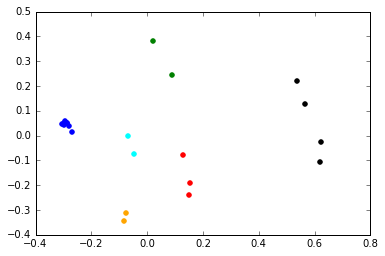

In [61]:
for i, row in enumerate(data_r): 
    plt.scatter(row[0],row[1], color=COLORS[METEORITE_ORIGIN[i]])
#plt.show()
plt.savefig('../ML_TestDataResults/5Cat')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


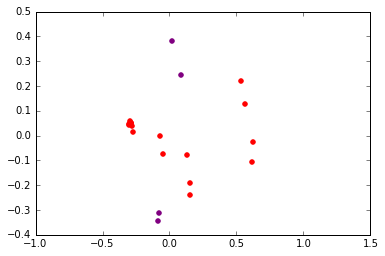

In [68]:

for i, row in enumerate(data_r): 
    if only_HH_and_3L_test_classes[i] == 1: 
        plt.scatter(row[0],row[1], color='red')
    else:
        plt.scatter(row[0],row[1], color='purple')
plt.xlim(-1,1.5)
#plt.show()
#plt.savefig('../ML_TestDataResults/2Cat')
np.save('../ML_testDataResults/reduced_test_data',data_r)
np.save('../ML_testDataResults/reduced_test_classes',only_HH_and_3L_test_classes)
for i,val in enumerate(only_HH_and_3L_test_classes):
    if val == 1:
        only_HH_and_3L_test_classes[i] = 0
    else: 
        only_HH_and_3L_test_classes[i] = 1
print only_HH_and_3L_test_classes